In [1]:

import numpy as np
import pandas as pd
from tqdm import tqdm

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn import tree
from sklearn import metrics
from collections import Counter
from IPython.display import Markdown, display
import matplotlib.pyplot as plt
import seaborn as sns


#from common_utils import compute_metrics

# load the data
train_data = pd.read_csv('C:/Users/thano/Υπολογιστής/ΘΑΝΟΣ/PROJECTS/train.csv',sep= ',', header= 0)
test_data = pd.read_csv('C:/Users/thano/Υπολογιστής/ΘΑΝΟΣ/PROJECTS/test.csv',sep= ',', header= 0)
titanic_data = pd.concat([train_data, test_data], ignore_index = False)

In [10]:
titanic_data.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [12]:
print ("Dataset Lenght:: ", len(titanic_data))
print ("Dataset Shape:: ", titanic_data.shape)

print ("Rows     : " ,titanic_data.isnull().shape[0])
print ("Columns  : " ,titanic_data.isnull().shape[1])


Dataset Lenght::  1309
Dataset Shape::  (1309, 12)
Rows     :  1309
Columns  :  12


In [ ]:
titanic_data['Survived'].value_counts()

In [14]:
print ("\nMissing values :  ", test_data.isnull().sum())


Missing values :   PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [13]:
print ("\nMissing values :  ", train_data.isnull().sum())


Missing values :   PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


C:\Users\thano\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

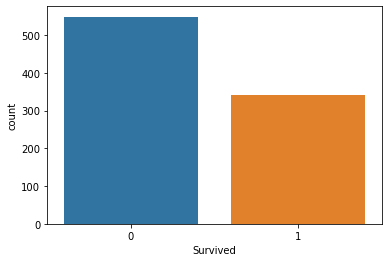

In [17]:
sns.countplot('Survived',data=train_data)

In [18]:
train_data.groupby(
    ['Survived', 'Sex']
)['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


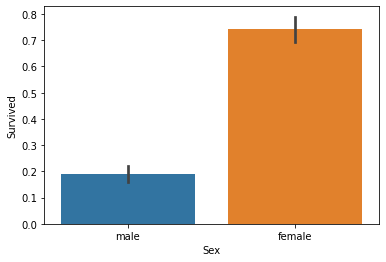

In [20]:
#bar plot of survival by sex
sns.barplot(x="Sex", y="Survived", data=train_data)

#Survival percentage of females vs. males that survive
print("Percentage of females who survived:", train_data["Survived"][train_data["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", train_data["Survived"][train_data["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


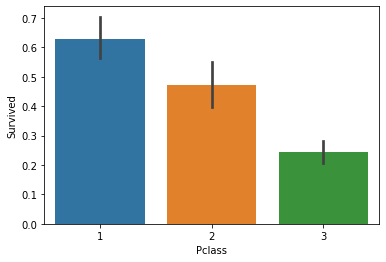

In [22]:
#draw a bar plot of survival by Pclass
sns.barplot(x="Pclass", y="Survived", data=train_data)

#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", train_data["Survived"][train_data["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", train_data["Survived"][train_data["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", train_data["Survived"][train_data["Pclass"] == 3].value_counts(normalize = True)[1]*100)

In [23]:
#drop unnecesary columns 
titanic_data.drop(columns= ['Name','Ticket','Cabin'], inplace = True)
train_data.drop(columns= ['Name','Ticket','Cabin'], inplace = True)
test_data.drop(columns= ['Name','Ticket','Cabin'], inplace = True)

In [ ]:
titanic_data.head()

In [24]:
train_data.replace({'Sex' :{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}},inplace = True)
test_data.replace({'Sex' :{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}},inplace = True)
                                 

<AxesSubplot:>

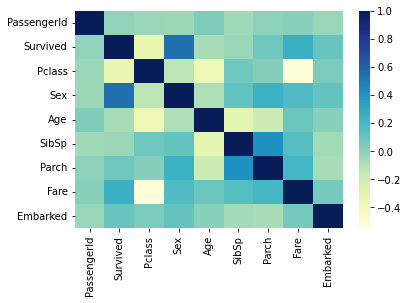

In [25]:
sns.heatmap(train_data.corr(), cmap = "YlGnBu")

In [ ]:
titanic_data = titanic_data[['PassengerId','Survived','Pclass','Sex','SibSp','Parch','Fare','Embarked','Age']]
titanic_data.head()

In [ ]:
titanic1.head()

In [ ]:
titanic_data_test = titanic_data[titanic_data['Age'].isnull()]
titanic_data_test

In [ ]:
X1_test = titanic_data_test.drop('Age',axis=1)
X1_test

In [ ]:
titanic_data_train = titanic_data.dropna(subset = ['Age'])
titanic_data_train

In [ ]:
X1_train = titanic_data_train.drop('Age',axis=1)
X1_train

In [ ]:
y1_train = titanic_data_train['Age']
y1_train

In [ ]:
y1_train

In [ ]:
#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y1_train = lab.fit_transform(y1_train)

In [ ]:
#HistGradient classifier (only classifier that works with NaN values)
from sklearn.ensemble import HistGradientBoostingClassifier
clf1 = HistGradientBoostingClassifier().fit(X1_train, y1_train)

In [ ]:
y1_pred = clf1.predict(X1_test)

In [ ]:
#convert to Dataframe in order to visualize
AgeMissing = pd.DataFrame(y1_pred)
AgeMissing

In [ ]:
#visualize occupation and occupation nonMissing 
sns.set
sns.displot(AgeMissing, x=0, kind = 'kde', color = 'r')
sns.displot(titanic_data_train, x=y1_train, kind ='kde')
 
# visualizing illustration
plt.show()

In [ ]:
X1_test['Age'] = y1_pred
X1_test

In [ ]:
titanic2 = pd.concat([titanic_data_train,X1_test])
titanic2.head(30)

In [ ]:
titanic2.sort_index(inplace=True)
titanic2.head(10)

In [ ]:
#------------------------------------------- END OF 2ND LOOP -------------------------------------------------------------------

In [ ]:
titanic_check_missing = (titanic2.isnull()).sum()
titanic_check_missing

In [ ]:
titanic2 = titanic2[['PassengerId','Survived','Pclass','Sex','SibSp','Parch','Fare','Age', 'Embarked']]
titanic2.head()

In [ ]:
titanic2_test = titanic2[titanic2['Embarked'].isnull()]
titanic2_test

In [ ]:
X2_test = titanic2_test.drop('Embarked',axis=1)
X2_test

In [ ]:
titanic2_train = titanic2.dropna(subset = ['Embarked'])
titanic2_train

In [ ]:
X2_train = titanic2_train.drop('Embarked',axis=1)
X2_train

In [ ]:
y2_train = titanic2_train['Embarked']
y2_train

In [ ]:
#HistGradient classifier (only classifier that works with NaN values)
from sklearn.ensemble import HistGradientBoostingClassifier
clf2 = HistGradientBoostingClassifier().fit(X2_train, y2_train)

In [ ]:
y2_pred = clf2.predict(X2_test)

In [ ]:
#convert to Dataframe in order to visualize
EmbarkedMissing = pd.DataFrame(y2_pred)
EmbarkedMissing 

In [ ]:
#visualize native-countryMissing and native-country nonMissing 
sns.set
sns.displot(EmbarkedMissing, x=0, kind = 'kde', color = 'r')
sns.displot(titanic2, x=y2_train, kind ='kde')
 
# visualizing illustration
plt.show()

In [ ]:
X2_test['Embarked'] = y2_pred
X2_test

In [ ]:
titanic3 = pd.concat([titanic2_train,X2_test])
titanic3.head(10)

In [ ]:
titanic3.sort_index(inplace=True)
titanic3.head()

In [ ]:
titanic_final = titanic3[['PassengerId','Pclass','Sex','SibSp','Parch','Fare','Age', 'Embarked','Survived']]
titanic_final

In [ ]:
# Putting independent variables/features to X
x = titanic_final.drop('Survived',axis=1)
# Putting response/dependent variable/feature to y
Y = titanic_final['Survived']

In [ ]:
# Splitting the data into train and test
x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size=0.25)


In [ ]:
models = []
#models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC()))
models.append(('HGB', HistGradientBoostingClassifier()))

In [ ]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

In [ ]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    cv_results = cross_val_score(model, x_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

In [ ]:
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(x_train,Y_train)
# predictions
rfc_predict = rfc.predict(x_test)

In [ ]:
rfc = RandomForestClassifier(n_estimators=600, max_depth=300, max_features='sqrt')
rfc.fit(x_train,Y_train)
rfc_predict = rfc.predict(x_test)
rfc_cv_score = cross_val_score(rfc, x, Y, cv=10, scoring='roc_auc')
print("=== Confusion Matrix ===")
print(confusion_matrix(Y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(Y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

In [ ]:
accuracy_score(Y_test, rfc_predict)